<a href="https://colab.research.google.com/github/takatakamanbou/ML/blob/2025/ML2025_ex02notebookB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML ex02notebookB

<img width=72 src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/ML-logo.png"> [この授業のウェブページ](https://www-tlab.math.ryukoku.ac.jp/wiki/?ML/2025)


----
## 汎化と過適合
----

機械学習において，入力されたデータから予測値を出力する仕組みのことを **モデル** (model)と言います．
直線当てはめにおける式 $y = ax+b$（パラメータは $a$と $b$） や平面当てはめにおける $y = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$ （パラメータは $w_0, w_1, \ldots , w_D$）などはモデルを表す式です．


これまで説明してきた問題では，モデルが学習データによくよてはまるようにパラメータを決めていました．このこと自体はまっとうなことです．しかし，実際の機械学習の問題では，「学習データによくあてはまるようにする」ことだけを考えていると，おかしな結果を得てしまうことがあります．そのことを理解するために，データに多項式を当てはめる問題を例にあげて説明します．



----
### 準備



以下，コードセルを上から順に実行してながら読んでいってね．

In [ ]:
# 準備あれこれ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set_theme()

# データを読み込む
dfGori = pd.read_csv('https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/gorigori.csv', header=0)

----
### 多項式当てはめ



直線当てはめでは，モデルとして $y = ax+b$ という直線の式を仮定しています．
二つの変数の間の関係がもっと複雑な場合には，直線当てはめではうまくいきません．
試しに，本当は $y = \sin{x}$ という関係にあるようなデータに対して最小二乗法で直線を当てはめてみると，こんなんなります．

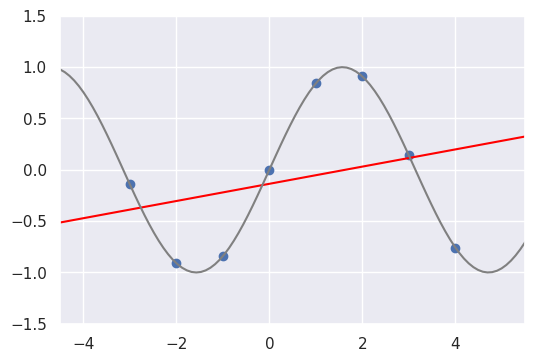

In [ ]:
# データを用意
X = np.linspace(-3, 4, 8)
Y = np.sin(X)  # 真の関係は y = sin(x)
XX = np.vstack([X, np.ones_like(X)]).T
xmin, xmax = -4.5, 5.5

# 直線当てはめの最小二乗法
XTX = XX.T @ XX  # 正規方程式左辺の 2x2 行列
XTY = XX.T @ Y   # 正規方程式右辺の ベクトル
a, b = np.linalg.solve(XTX, XTY)

# 直線の式を計算
Xr =  np.linspace(xmin, xmax, 100)
Yest = a * Xr + b
Ytru = np.sin(Xr)

# グラフを描く
fig, ax = plt.subplots(1, facecolor='white', figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(Xr, Yest, color='red')
ax.plot(Xr, Ytru, color='gray')
ax.set_xlim(xmin, xmax)
ax.set_ylim(-1.5, 1.5)
plt.show()

灰色の曲線が $y = \sin{x}$，青い8つの点が学習データ，赤い直線が最小二乗法で得られた直線です．
当たり前ですがぜんぜんうまく当てはまってませんね．

このような場合への対応策の一つとして，直線のかわりに多項式を当てはめる方法があります．
以下にその問題設定を示します．

**［最小二乗法による多項式当てはめの問題設定］**

変数 $x$ と $y$ の値のペア $N$ 組から成るデータ
$$
(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)
$$
がある．変数 $x$ の値から $y$ の値が決まるものとし，そのモデルとして $(D+1)$ 個のパラメータをもつ $D$ 次多項式

$$
y = f(x) = w_0 + w_1 x + w_2x^2 + \cdots + w_Dx^{D} \qquad (1)
$$

を考える．


このとき，モデルの出力 $f(x_n)$ とその正解の値 $y_n$ との間の二乗誤差の和
$$
\sum_{n=1}^{N}(y_n - f(x_n))^2
$$
を最小にするパラメータ $w_0, w_1, \ldots, w_D$ を求めたい．



ここから先は，正規方程式を導出 → その解が求めるパラメータ，ということで，これまでと同様です．
実は，この多項式当てはめの問題は平面当てはめの問題をちょこっと変形したものとみなせます．

平面当てはめでは，$1, x_1, x_2, \ldots, x_D$ という $(D+1)$ 個の値をならべた $(D+1)$ 次元ベクトル
$$
\pmb{x} = (1, x_1, x_2, x_3, \ldots, x_D)
$$
を考えましたが，そのかわりに
$$
\pmb{x} = (1, x, x^2, x^3, \ldots, x^D)
$$
としてやれば ok，というわけです．こうすれば，平面当てはめと同様に$(D+1)$個のパラメータをならべたベクトルを
$$
\pmb{w} = (w_0, w_1, w_2, \ldots, w_D)
$$
として，式$(1)$を
$$
y = f(\pmb{x}) = \pmb{w}\cdot\pmb{x} \qquad (2)
$$
と表せます．以下，平面当てはめの定式化と同じですので，正規方程式も同じ形になります．


上記の $\sin{x}$ の例で試しにやってみると，以下のようになります．


1次多項式の当てはめ．
2個のパラメータの値:  [-0.13648178  0.08376293]
学習データに対する二乗誤差の和: 3.316095


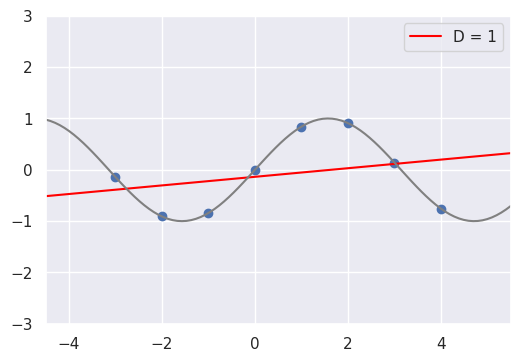

In [ ]:
#@title 多項式の次数 D をいろいろ変えてこのセルを何度か実行し直してみよう {run: "auto"}
D = 1 #@param{type:"slider", min:1, max:8, step:1}

# データを用意
X = np.linspace(-3, 4, 8)
Y = np.sin(X)  # 真の関係は y = sin(x)
XX = np.ones((D+1, len(X)))
for d in range(D):
    XX[d+1, :] = X ** (d+1)
xmin, xmax = -4.5, 5.5

# 多項式当てはめの最小二乗法
XXT = XX @ XX.T  # 正規方程式左辺の行列
XYT = XX @ Y   # 正規方程式右辺のベクトル
w = np.linalg.solve(XXT, XYT)
print(f'{D}次多項式の当てはめ．')
print(f'{len(w)}個のパラメータの値: ', end=' ')
print(w)
sqe = np.sum(np.square(Y - w @ XX))
print(f'学習データに対する二乗誤差の和: {sqe:.6f}')

# 直線の式を計算
Xr =  np.linspace(xmin, xmax, 100)
XXr = np.ones((D+1, len(Xr)))
for d in range(D):
    XXr[d+1, :] = Xr ** (d+1)
Yest = w @ XXr
Ytru = np.sin(Xr)

# グラフを描く
fig, ax = plt.subplots(1, facecolor='white', figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(Xr, Yest, color='red', label=f'D = {D}')
ax.plot(Xr, Ytru, color='gray')
ax.set_xlim(xmin, xmax)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

多項式の次数を上げるとだんだん二乗誤差の和が小さくなっており，学習データに対する当てはまりが良くなっていることがわかります．

この結果を見る限りでは，「多項式当てはめでは，次数を大きくするほど複雑な関係を表せる．だから次数を大きくすればするほどよい」と思えるわけですが，本当にそう思ってよいでしょうか？
「学習データ」への当てはまりはたしかによくなっており，学習データに対する二乗誤差の和も小さくなっていっています．しかし，学習データ以外のところではどうでしょうか？

----
### 汎化と過適合

もう少し次数を大きくして上記の実験を続けてみましょう．


8次多項式の当てはめ．
9個のパラメータの値:  [-3.23490259e-13  1.00120081e+00 -6.02117366e-04 -1.68213706e-01
  8.19548638e-04  8.68053821e-03 -2.34156754e-04 -1.96654381e-04
  1.67254824e-05]
学習データに対する二乗誤差の和: 2.567655e-25


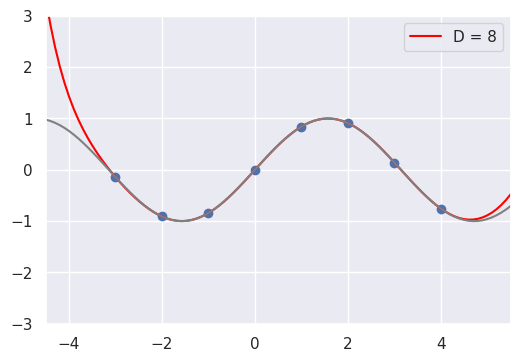

In [ ]:
#@title 多項式の次数 D をいろいろ変えてこのセルを何度か実行し直してみよう {run: "auto"}
D = 8 #@param{type:"slider", min:8, max:20, step:1}

# データを用意
X = np.linspace(-3, 4, 8)
Y = np.sin(X)  # 真の関係は y = sin(x)
XX = np.ones((D+1, len(X)))
for d in range(D):
    XX[d+1, :] = X ** (d+1)
xmin, xmax = -4.5, 5.5

# 多項式当てはめの最小二乗法
XXT = XX @ XX.T  # 正規方程式左辺の行列
XYT = XX @ Y   # 正規方程式右辺のベクトル
w = np.linalg.solve(XXT, XYT)
print(f'{D}次多項式の当てはめ．')
print(f'{len(w)}個のパラメータの値: ', end=' ')
print(w)
sqe = np.sum(np.square(Y - w @ XX))
print(f'学習データに対する二乗誤差の和: {sqe:.6e}')

# 直線の式を計算
Xr =  np.linspace(xmin, xmax, 100)
XXr = np.ones((D+1, len(Xr)))
for d in range(D):
    XXr[d+1, :] = Xr ** (d+1)
Yest = w @ XXr
Ytru = np.sin(Xr)

# グラフを描く
fig, ax = plt.subplots(1, facecolor='white', figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(Xr, Yest, color='red', label=f'D = {D}')
ax.plot(Xr, Ytru, color='gray')
ax.set_xlim(xmin, xmax)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

すると，「学習データ（青い点）への当てはまりはよいのに，それ以外のところで真の関数（灰色）とは大きくずれてしまう」ようになっていることに気づきます．
学習データに対しては $y$ の値を正確に予測できているが，学習データとは異なる $x$ の値に対しては $y$ の値をうまく予測できていないわけです．

これでは困りますね．教師あり学習の場合，学習データは $(入力, それに対する出力の正解)$ というペアを集めたものです．それらを使ってモデルのパラメータを決めているわけですから，学習データに対して正解できるのは当然とも言えます．むしろ，学習時に見たことがない入力に対しても望ましい出力をできることの方が大事でしょう．

ということで，機械学習においては，「学習データに対して望ましい出力ができるように」するだけでなく，「学習時に与えられていない未知のデータに対しても望ましい出力ができるように」することが目標となります．
未知のデータに対しても望ましい出力ができることを， 「未知データに**汎化** (generalization) できる」とか「**汎化性能** が高い」というふうに言います．

未知データは学習時には未知なものですから，それを使ってパラメータを調節することは当然できません．
機械学習の目標は，「学習データを用いて，未知データに対してもなるべく汎化できるようなパラメータを求めること」と言えます．

また，多項式当てはめの例では，多項式の次数を増やす = パラメータの数を増やすと，より複雑な関数，より複雑なモデルを作ることができます．ですが，パラメータ数を増やせばよいかというと必ずしもそうではなく，パラメータを増やすと学習データにぴったり当てはまようになるるものの，汎化性能はむしろ低下しているようです．このように，パラメータ数の多いモデルが学習データに適合しずぎて汎化性能が低下してしまう現象を，**過適合**(over-fitting) または **過学習** と言います．

<img width="50%" src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/modeldof.png">

ゴリゴリ君のデータに対しても多項式当てはめやってみましょう．
次数を大きくしていくと，学習データにうまく当てはまろうとぐにゃぐにゃしすぎて（学習データに過適合して），気温とアイス売上数の関係としてはおかしなものになっていってしまう（汎化性能が低下してしまう）のが見えるでしょう．

1次多項式の当てはめ．
2個のパラメータの値:  [2.33749775 2.92198946]
学習データに対する二乗誤差の和: 5.349924e+03


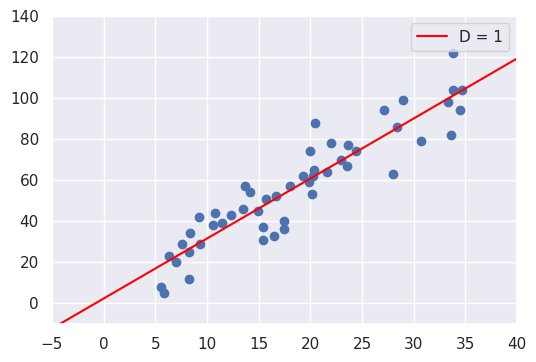

In [ ]:
#@title 多項式の次数 D をいろいろ変えてこのセルを何度か実行し直してみよう {run: "auto"}
D = 1 #@param{type:"slider", min:1, max:20, step:1}

# データを用意
X = dfGori['気温']
Y = dfGori['アイス売上数']
XX = np.ones((D+1, len(X)))
for d in range(D):
    XX[d+1, :] = X ** (d+1)
xmin, xmax = -5, 40

# 多項式当てはめの最小二乗法
XXT = XX @ XX.T  # 正規方程式左辺の行列
XYT = XX @ Y   # 正規方程式右辺のベクトル
w = np.linalg.solve(XXT, XYT)
print(f'{D}次多項式の当てはめ．')
print(f'{len(w)}個のパラメータの値: ', end=' ')
print(w)
sqe = np.sum(np.square(Y - w @ XX))
print(f'学習データに対する二乗誤差の和: {sqe:.6e}')

# 直線の式を計算
Xr =  np.linspace(xmin, xmax, 200)
XXr = np.ones((D+1, len(Xr)))
for d in range(D):
    XXr[d+1, :] = Xr ** (d+1)
Yest = w @ XXr
Ytru = np.sin(Xr)

# グラフを描く
fig, ax = plt.subplots(1, facecolor='white', figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(Xr, Yest, color='red', label=f'D = {D}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(-10, 140)
ax.legend()
plt.show()

ここでは多項式当てはめの例で説明しましたが，過適合と汎化の問題は，機械学習の様々な場面で起こり得るものです．
一般に，パラメータ数の多いモデルほど複雑な入出力関係を表現できます．
モデルがデータに合わなかったりパラメータが少なすぎたりすると学習データにうまく当てはめることができませんが，パラメータ数を多くすると，学習データにはうまく当てはまるようになります．
しかし，あまりにパラメータ数が多いと，学習データに過適合して未知データにうまく汎化できない結果となる場合があります．

<img width="50%" src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/modeldof.png">


じゃあパラメータの数をどう決めたらいいの？という疑問が生じますが，残念ながら，どんな場合にもこれで解決，というような万能の解決法はありません．
いくつかの対処法を「機械学習II」の方で説明します．

### ★ 練習問題

次の問に答えなさい．

(1) 教師あり学習の汎化性能について述べた以下の文のうち正しいものをひとつ選びなさい．

1. 教師あり学習では，学習データに対する誤差が小さければ小さいほど汎化性能が高い
1. 教師あり学習では，学習データに対する誤差が小さければ小さいほど汎化性能が低い
1. 教師あり学習では，学習データに対する誤差が小さければ汎化性能も高くなるとは限らない


(2) この notebook の内容について述べた以下の文のうち **誤っているもの** をひとつ選びなさい．

1. ここで扱っている例では，モデルのパラメータ数を増やすと過適合が見られる
1. ここで扱っている例では，モデルのパラメータ数を増やして複雑にするほど汎化性能が高くなっている
1. 多項式当てはめの例では，多項式の次数を大きくするほどモデルのパラメータ数が多くなる

